In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/  topmer.csv


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Thesis2_Dec2021/data_genes/GeneExpression_sourcefile.csv')
#del df["Unnamed: 0"]




,COSMIC_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,ENSG00000001561,ENSG00000001617,ENSG00000001626,ENSG00000001629,ENSG00000001631,ENSG00000002016,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002587,ENSG00000002726,ENSG00000002745,ENSG00000002746,ENSG00000002822,ENSG00000002834,ENSG00000002919,ENSG00000002933,ENSG00000003056,ENSG00000003096,ENSG00000003137,ENSG00000003147,ENSG00000003249,ENSG00000003393,ENSG00000003400,ENSG00000003402,ENSG00000003436,...,ENSG00000260347,ENSG00000260359,ENSG00000260432,ENSG00000260461,ENSG00000260495,ENSG00000260539,ENSG00000260612,ENSG00000260880,ENSG00000261215,ENSG00000261253,ENSG00000261351,ENSG00000261434,ENSG00000261452,ENSG00000261649,ENSG00000261685,ENSG00000261701,ENSG00000261742,ENSG00000261803,ENSG00000261819,ENSG00000261857,ENSG00000261925,ENSG00000262152,ENSG00000262557,ENSG00000262628,ENSG00000263002,ENSG00000263417,ENSG00000263574,ENSG00000263843,ENSG00000264247,ENSG00000264424,ENSG00000264575,ENSG00000265060,ENSG00000265246,ENSG00000265298,ENSG00000265480,ENSG00000265929,ENSG00000266066,ENSG00000266282,ENSG00000266433,ENSG00000266753
0,906826,7.632023,2.964585,10.379553,3.614794,3.380681,3.324692,3.566350,8.204530,5.235118,5.369039,3.596993,7.641756,4.549065,4.488261,4.118309,3.024970,8.296444,3.646615,3.780467,7.458409,6.453926,9.460478,3.517445,3.350498,3.741032,2.661393,5.200431,4.931681,4.767457,2.975821,9.792014,6.213763,3.440152,4.075371,3.689651,3.947773,2.831262,5.463531,12.091616,...,3.183110,4.633899,3.077504,3.019080,3.081601,5.945066,2.939461,2.927571,2.991526,2.906636,3.901483,3.435723,3.051134,3.529562,3.030229,2.790461,2.801037,3.178122,6.975354,3.588889,3.029979,3.665788,3.389938,3.134197,4.841169,3.005416,2.939461,4.059000,3.411250,2.628932,6.786925,2.997054,3.109774,7.882377,3.331134,2.852537,3.130696,9.986616,3.073724,7.284733
1,687983,7.548671,2.777716,11.807341,4.066887,3.732485,3.152404,7.827172,6.616972,5.809264,7.209653,3.753548,5.715404,4.306627,6.030564,3.951478,3.123943,8.313609,3.858846,3.921778,7.479327,6.742826,9.474606,3.044297,3.210050,2.729453,2.788262,6.139840,4.525647,5.246301,3.035024,8.845537,3.241823,3.073604,4.547098,4.062049,4.017758,2.788942,4.662621,3.470365,...,4.343442,2.618501,2.879343,3.331508,3.285192,6.798999,3.027941,3.191654,2.962621,3.074109,4.923347,3.345257,7.026350,3.599434,3.132953,2.778059,2.861326,2.996229,8.721021,3.419746,3.118254,3.053174,3.577202,3.327528,4.570476,2.878796,3.003163,3.572520,3.586613,2.783441,5.317911,3.263745,3.059424,8.681302,2.992611,2.776771,3.260982,9.002814,3.000182,8.504804
2,910927,8.712338,2.643508,9.880733,3.956230,3.236620,3.241246,2.931034,8.191246,5.426841,5.120747,3.946064,5.601235,3.832190,4.548564,4.440084,2.896733,7.938611,3.811614,3.597864,7.419672,5.655691,10.011329,3.924394,3.215727,2.699162,2.902831,5.393870,4.145480,4.645800,2.846260,8.868636,3.054858,3.082341,3.032266,4.007929,3.784884,3.191751,5.519212,10.236172,...,3.160929,2.966000,2.979303,3.338575,3.036464,7.318819,2.984301,3.278479,3.255958,2.964270,3.883598,3.154062,7.501269,3.347474,2.752734,2.661848,2.718044,2.828840,8.304669,3.449147,2.775777,3.226808,3.384858,3.326309,4.214729,2.985562,3.083179,3.482183,3.725436,2.603604,3.143006,3.112145,2.930254,8.707886,2.886574,2.685307,3.176239,9.113243,2.916274,7.059092
3,1240138,7.797142,2.817923,9.883471,4.063701,3.558414,3.101247,7.211707,8.630643,5.617714,4.996434,3.378736,6.752791,3.512547,5.309896,4.210272,2.950093,7.231354,3.772951,3.220164,7.731137,5.259367,8.173147,2.957085,3.396187,2.732190,3.000899,5.447174,4.971736,4.558836,2.965398,8.974729,3.349643,3.431314,7.487131,3.577693,3.898134,3.110345,6.322941,7.625778,...,3.079667,4.609837,3.699916,3.426935,3.153041,5.597614,3.145512,2.816586,3.107612,2.875945,4.028170,3.184647,6.743810,4.000042,2.934522,2.690589,2.757298,2.935488,7.776016,3.349624

In [ ]:
df

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,ENSG00000001561,ENSG00000001617,ENSG00000001626,ENSG00000001629,ENSG00000001631,ENSG00000002016,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002587,ENSG00000002726,ENSG00000002745,ENSG00000002746,ENSG00000002822,ENSG00000002834,ENSG00000002919,ENSG00000002933,ENSG00000003056,ENSG00000003096,ENSG00000003137,ENSG00000003147,ENSG00000003249,ENSG00000003393,ENSG00000003400,ENSG00000003402,ENSG00000003436,ENSG00000003509,ENSG00000003756,...,ENSG00000260347,ENSG00000260359,ENSG00000260432,ENSG00000260461,ENSG00000260495,ENSG00000260539,ENSG00000260612,ENSG00000260880,ENSG00000261215,ENSG00000261253,ENSG00000261351,ENSG00000261434,ENSG00000261452,ENSG00000261649,ENSG00000261685,ENSG00000261701,ENSG00000261742,ENSG00000261803,ENSG00000261819,ENSG00000261857,ENSG00000261925,ENSG00000262152,ENSG00000262557,ENSG00000262628,ENSG00000263002,ENSG00000263417,ENSG00000263574,ENSG00000263843,ENSG00000264247,ENSG00000264424,ENSG00000264575,ENSG00000265060,ENSG00000265246,ENSG00000265298,ENSG00000265480,ENSG00000265929,ENSG00000266066,ENSG00000266282,ENSG00000266433,ENSG00000266753
0,7.632023,2.964585,10.379553,3.614794,3.324692,3.566350,8.204530,5.235118,5.369039,3.596993,7.641756,4.549065,4.488261,4.118309,3.024970,8.296444,3.646615,3.780467,7.458409,6.453926,9.460478,3.517445,3.350498,3.741032,2.661393,5.200431,4.931681,4.767457,2.975821,9.792014,6.213763,3.440152,4.075371,3.689651,3.947773,2.831262,5.463531,12.091616,5.804314,8.548148,...,3.183110,4.633899,3.077504,3.019080,3.081601,5.945066,2.939461,2.927571,2.991526,2.906636,3.901483,3.435723,3.051134,3.529562,3.030229,2.790461,2.801037,3.178122,6.975354,3.588889,3.029979,3.665788,3.389938,3.134197,4.841169,3.005416,2.939461,4.059000,3.411250,2.628932,6.786925,2.997054,3.109774,7.882377,3.331134,2.852537,3.130696,9.986616,3.073724,7.284733
1,7.548671,2.777716,11.807341,4.066887,3.152404,7.827172,6.616972,5.809264,7.209653,3.753548,5.715404,4.306627,6.030564,3.951478,3.123943,8.313609,3.858846,3.921778,7.479327,6.742826,9.474606,3.044297,3.210050,2.729453,2.788262,6.139840,4.525647,5.246301,3.035024,8.845537,3.241823,3.073604,4.547098,4.062049,4.017758,2.788942,4.662621,3.470365,6.484788,8.736863,...,4.343442,2.618501,2.879343,3.331508,3.285192,6.798999,3.027941,3.191654,2.962621,3.074109,4.923347,3.345257,7.026350,3.599434,3.132953,2.778059,2.861326,2.996229,8.721021,3.419746,3.118254,3.053174,3.577202,3.327528,4.570476,2.878796,3.003163,3.572520,3.586613,2.783441,5.317911,3.263745,3.059424,8.681302,2.992611,2.776771,3.260982,9.002814,3.000182,8.504804
2,8.712338,2.643508,9.880733,3.956230,3.241246,2.931034,8.191246,5.426841,5.120747,3.946064,5.601235,3.832190,4.548564,4.440084,2.896733,7.938611,3.811614,3.597864,7.419672,5.655691,10.011329,3.924394,3.215727,2.699162,2.902831,5.393870,4.145480,4.645800,2.846260,8.868636,3.054858,3.082341,3.032266,4.007929,3.784884,3.191751,5.519212,10.236172,5.672254,8.360662,...,3.160929,2.966000,2.979303,3.338575,3.036464,7.318819,2.984301,3.278479,3.255958,2.964270,3.883598,3.154062,7.501269,3.347474,2.752734,2.661848,2.718044,2.828840,8.304669,3.449147,2.775777,3.226808,3.384858,3.326309,4.214729,2.985562,3.083179,3.482183,3.725436,2.603604,3.143006,3.112145,2.930254,8.707886,2.886574,2.685307,3.176239,9.113243,2.916274,7.059092
3,7.797142,2.817923,9.883471,4.063701,3.101247,7.211707,8.630643,5.617714,4.996434,3.378736,6.752791,3.512547,5.309896,4.210272,2.950093,7.231354,3.772951,3.220164,7.731137,5.259367,8.173147,2.957085,3.396187,2.732190,3.000899,5.447174,4.971736,4.558836,2.965398,8.974729,3.349643,3.431314,7.487131,3.577693,3.898134,3.110345,6.322941,7.625778,5.171895,7.201922,...,3.079667,4.609837,3.699916,3.426935,3.153041,5.597614,3.145512,2.816586,3.107612,2.875945,4.028170,3.184647,6.743810,4.000042,2.934522,2.690589,2.757298,2.935488,7.77

In [ ]:
df = df.astype({"COSMIC_ID": int})

In [ ]:
df2 = df.iloc[:, :1]

In [ ]:
#del df1["COSMIC_ID"]

columns1 = df.columns

In [ ]:
drug_data = pd.read_csv('/content/drive/MyDrive/Thesis2_Dec2021/data_genes/Drug Responce_100_gdsc_sdf.csv', encoding= 'unicode_escape')
drug_data

,COSMIC_ID,CELL_LINE_NAME,DRUG_NAME,LN_IC50,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,749709,HCC1954,Camptothecin,-0.251083,NaN,NaN,NaN,NaN
1,749710,HCC1143,Camptothecin,1.343315,NaN,NaN,NaN,NaN
2,749711,HCC1187,Camptothecin,1.736985,NaN,NaN,NaN,NaN
3,749712,HCC1395,Camptothecin,-2.309078,NaN,NaN,NaN,NaN
4,749713,HCC1599,Camptothecin,-3.106684,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
65398,1290798,EFM-192A,JQ1,3.576583,NaN,NaN,NaN,NaN
65399,1290905,HCC1428,JQ1,1.402466,NaN,NaN,NaN,NaN
65400,1290922,HDQ-P1,JQ1,2.762460,NaN,NaN,NaN,NaN
65401,1298157,JIMT-1,JQ1,3.442930,NaN,NaN,NaN,NaN


In [ ]:
del drug_data['Unnamed: 4']
del drug_data['Unnamed: 5']
del drug_data['Unnamed: 6']
del drug_data['Unnamed: 7']
# del drug_data['Unnamed: 8']
# del drug_data['Unnamed: 9']
# del drug_data['Unnamed: 10']
# del drug_data['Unnamed: 11']
# del drug_data['Unnamed: 12']
drug_data


,COSMIC_ID,CELL_LINE_NAME,DRUG_NAME,LN_IC50
0,749709,HCC1954,Camptothecin,-0.251083
1,749710,HCC1143,Camptothecin,1.343315
2,749711,HCC1187,Camptothecin,1.736985
3,749712,HCC1395,Camptothecin,-2.309078
4,749713,HCC1599,Camptothecin,-3.106684
...,...,...,...,...
65398,1290798,EFM-192A,JQ1,3.576583
65399,1290905,HCC1428,JQ1,1.402466
65400,1290922,HDQ-P1,JQ1,2.762460
65401,1298157,JIMT-1,JQ1,3.442930


### **Normalization (Min Max Scaler)**


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

x= df.iloc[:, 1:].values
#x= df.iloc[:, :].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
expdatanorm = pd.DataFrame(x_scaled)
print ('The shape of variance matrix =' , expdatanorm.shape)

The shape of variance matrix = (1018, 17736)


In [ ]:
expdatanorm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17696,17697,17698,17699,17700,17701,17702,17703,17704,17705,17706,17707,17708,17709,17710,17711,17712,17713,17714,17715,17716,17717,17718,17719,17720,17721,17722,17723,17724,17725,17726,17727,17728,17729,17730,17731,17732,17733,17734,17735
0,0.090174,0.831734,0.134854,0.173938,0.056670,0.092200,0.711781,0.295762,0.340987,0.278234,0.742342,0.599873,0.310306,0.147415,0.031824,0.418007,0.172443,0.319434,0.680111,0.526486,0.679726,0.125355,0.051405,0.186721,0.031059,0.190874,0.342158,0.230392,0.035336,0.820529,0.471317,0.172845,0.151907,0.260020,0.199171,0.066666,0.361543,0.977863,0.429066,0.756991,...,0.172654,0.320180,0.066718,0.132262,0.133767,0.307158,0.231446,0.019054,0.282120,0.148932,0.259837,0.092130,0.032295,0.217113,0.043037,0.057655,0.072909,0.617143,0.491339,0.060244,0.083015,0.139713,0.221998,0.132657,0.669727,0.168623,0.326715,0.502761,0.135343,0.038248,0.759824,0.244857,0.086937,0.270578,0.231242,0.061037,0.294185,0.662015,0.187001,0.398991
1,0.054091,1.000000,0.260056,0.293690,0.035300,0.570020,0.498266,0.374794,0.739398,0.338531,0.413151,0.502340,0.607386,0.110605,0.043824,0.421579,0.216578,0.376647,0.683961,0.578262,0.681248,0.055207,0.035425,0.022377,0.067788,0.305928,0.245438,0.336185,0.041887,0.698167,0.069602,0.097481,0.213374,0.439000,0.216370,0.046950,0.233082,0.050551,0.613009,0.784067,...,0.536404,0.026991,0.034909,0.241586,0.184873,0.440619,0.293674,0.064394,0.261089,0.271386,0.560891,0.080544,0.647544,0.254231,0.054425,0.055732,0.087818,0.440152,0.760993,0.040269,0.098719,0.046183,0.263360,0.201099,0.554002,0.134859,0.375896,0.215475,0.177461,0.062879,0.486777,0.464771,0.077337,0.507740,0.111780,0.051589,0.356246,0.454642,0.134000,0.590433
2,0.028176,0.772948,0.229411,0.124901,0.046320,0.020954,0.709995,0.322153,0.287242,0.412678,0.393641,0.311474,0.321922,0.218414,0.016277,0.343545,0.206756,0.245505,0.672980,0.383428,0.739074,0.185688,0.036071,0.017455,0.100955,0.214566,0.154880,0.203514,0.020999,0.701153,0.044331,0.099277,0.015990,0.412989,0.159140,0.234605,0.370474,0.778290,0.393368,0.730091,...,0.165700,0.077543,0.050955,0.244059,0.122437,0.521862,0.262982,0.079300,0.474512,0.191074,0.254567,0.056056,0.721048,0.120380,0.012275,0.037707,0.052386,0.277275,0.696679,0.043741,0.037792,0.072692,0.220876,0.200668,0.401915,0.163329,0.437672,0.162127,0.210804,0.034210,0.082525,0.339761,0.052709,0.515632,0.074360,0.040184,0.315879,0.477919,0.073528,0.363586
3,0.061855,0.773271,0.259174,0.234437,0.028955,0.501000,0.769090,0.348427,0.260334,0.194173,0.590428,0.182881,0.468570,0.167707,0.022746,0.196373,0.198716,0.092587,0.730317,0.312400,0.541029,0.042277,0.056604,0.022821,0.129346,0.221094,0.351700,0.184301,0.034182,0.714869,0.084176,0.171028,0.596462,0.206212,0.186972,0.196681,0.499387,0.497512,0.258113,0.563841,...,0.140226,0.316679,0.166627,0.274978,0.151700,0.252854,0.376361,0.000000,0.366580,0.126492,0.297160,0.059973,0.603815,0.467051,0.032428,0.042165,0.062093,0.381049,0.615017,0.031989,0.064793,0.054981,0.085451,0.057500,0.336091,0.181669,0.320983,0.303929,0.035810,0.036751,0.084549,0.372276,0.037546,0.267656,0.400978,0.133843,0.267383,0.656043,0.318726,0.404231
4,0.088852,0.836364,0.336107,0.330414,0.016621,0.070789,0.724211,0.355544,0.083657,0.126718,0.494024,0.489154,0.529315,0.038617,0.043574,0.515520,0.189364,0.397824,0.595536,0.196272,0.648330,0.201501,0.058255,0.040653,0.072281,0.213277,0.454418,0.382668,0.034089,0.912117,0.037130,0.085330,0.108092,0.111587,0.280351,0.265903,0.279810,0.574992,0.620433,0.622026,...,0.413198,0.113996,0.012176,0.121574,0.176264,0.552606,0.197809,0.027883,0.271277,0.261868,0.196197,0.060743,0.115823,0.128144,0.039210,0.037267,0.042149,0.240381,0.591982,0.066232,0.088704,0.081633,0.190575,0.252984,0.681710,0.149895,0.287542,0.233630,0.087411,0.009784,0.177255,0.180061,0.037319,0.586302,0.259986,0.073348,0.333650,0.651974,0.419353,0.468367
...,...,...,...

In [ ]:
x= df.iloc[:, 1:]
x

,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,ENSG00000001561,ENSG00000001617,ENSG00000001626,ENSG00000001629,ENSG00000001631,ENSG00000002016,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002587,ENSG00000002726,ENSG00000002745,ENSG00000002746,ENSG00000002822,ENSG00000002834,ENSG00000002919,ENSG00000002933,ENSG00000003056,ENSG00000003096,ENSG00000003137,ENSG00000003147,ENSG00000003249,ENSG00000003393,ENSG00000003400,ENSG00000003402,ENSG00000003436,ENSG00000003509,ENSG00000003756,...,ENSG00000260347,ENSG00000260359,ENSG00000260432,ENSG00000260461,ENSG00000260495,ENSG00000260539,ENSG00000260612,ENSG00000260880,ENSG00000261215,ENSG00000261253,ENSG00000261351,ENSG00000261434,ENSG00000261452,ENSG00000261649,ENSG00000261685,ENSG00000261701,ENSG00000261742,ENSG00000261803,ENSG00000261819,ENSG00000261857,ENSG00000261925,ENSG00000262152,ENSG00000262557,ENSG00000262628,ENSG00000263002,ENSG00000263417,ENSG00000263574,ENSG00000263843,ENSG00000264247,ENSG00000264424,ENSG00000264575,ENSG00000265060,ENSG00000265246,ENSG00000265298,ENSG00000265480,ENSG00000265929,ENSG00000266066,ENSG00000266282,ENSG00000266433,ENSG00000266753
0,2.964585,10.379553,3.614794,3.380681,3.324692,3.566350,8.204530,5.235118,5.369039,3.596993,7.641756,4.549065,4.488261,4.118309,3.024970,8.296444,3.646615,3.780467,7.458409,6.453926,9.460478,3.517445,3.350498,3.741032,2.661393,5.200431,4.931681,4.767457,2.975821,9.792014,6.213763,3.440152,4.075371,3.689651,3.947773,2.831262,5.463531,12.091616,5.804314,8.548148,...,3.183110,4.633899,3.077504,3.019080,3.081601,5.945066,2.939461,2.927571,2.991526,2.906636,3.901483,3.435723,3.051134,3.529562,3.030229,2.790461,2.801037,3.178122,6.975354,3.588889,3.029979,3.665788,3.389938,3.134197,4.841169,3.005416,2.939461,4.059000,3.411250,2.628932,6.786925,2.997054,3.109774,7.882377,3.331134,2.852537,3.130696,9.986616,3.073724,7.284733
1,2.777716,11.807341,4.066887,3.732485,3.152404,7.827172,6.616972,5.809264,7.209653,3.753548,5.715404,4.306627,6.030564,3.951478,3.123943,8.313609,3.858846,3.921778,7.479327,6.742826,9.474606,3.044297,3.210050,2.729453,2.788262,6.139840,4.525647,5.246301,3.035024,8.845537,3.241823,3.073604,4.547098,4.062049,4.017758,2.788942,4.662621,3.470365,6.484788,8.736863,...,4.343442,2.618501,2.879343,3.331508,3.285192,6.798999,3.027941,3.191654,2.962621,3.074109,4.923347,3.345257,7.026350,3.599434,3.132953,2.778059,2.861326,2.996229,8.721021,3.419746,3.118254,3.053174,3.577202,3.327528,4.570476,2.878796,3.003163,3.572520,3.586613,2.783441,5.317911,3.263745,3.059424,8.681302,2.992611,2.776771,3.260982,9.002814,3.000182,8.504804
2,2.643508,9.880733,3.956230,3.236620,3.241246,2.931034,8.191246,5.426841,5.120747,3.946064,5.601235,3.832190,4.548564,4.440084,2.896733,7.938611,3.811614,3.597864,7.419672,5.655691,10.011329,3.924394,3.215727,2.699162,2.902831,5.393870,4.145480,4.645800,2.846260,8.868636,3.054858,3.082341,3.032266,4.007929,3.784884,3.191751,5.519212,10.236172,5.672254,8.360662,...,3.160929,2.966000,2.979303,3.338575,3.036464,7.318819,2.984301,3.278479,3.255958,2.964270,3.883598,3.154062,7.501269,3.347474,2.752734,2.661848,2.718044,2.828840,8.304669,3.449147,2.775777,3.226808,3.384858,3.326309,4.214729,2.985562,3.083179,3.482183,3.725436,2.603604,3.143006,3.112145,2.930254,8.707886,2.886574,2.685307,3.176239,9.113243,2.916274,7.059092
3,2.817923,9.883471,4.063701,3.558414,3.101247,7.211707,8.630643,5.617714,4.996434,3.378736,6.752791,3.512547,5.309896,4.210272,2.950093,7.231354,3.772951,3.220164,7.731137,5.259367,8.173147,2.957085,3.396187,2.732190,3.000899,5.447174,4.971736,4.558836,2.965398,8.974729,3.349643,3.431314,7.487131,3.577693,3.898134,3.110345,6.322941,7.625778,5.171895,7.201922,...,3.079667,4.609837,3.699916,3.426935,3.153041,5.597614,3.145512,2.816586,3.107612,2.875945,4.028170,3.184647,6.743810,4.000042,2.934522,2.690589,2.757298,2.935488,7.77

In [ ]:
expdatanorm['COSMIC_ID']=df["COSMIC_ID"]

In [ ]:
#expdatanorm.columns = columns1
expdatanorm = pd.concat([df2,expdatanorm],axis=1)

expdatanorm

,COSMIC_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,ENSG00000001561,ENSG00000001617,ENSG00000001626,ENSG00000001629,ENSG00000001631,ENSG00000002016,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002587,ENSG00000002726,ENSG00000002745,ENSG00000002746,ENSG00000002822,ENSG00000002834,ENSG00000002919,ENSG00000002933,ENSG00000003056,ENSG00000003096,ENSG00000003137,ENSG00000003147,ENSG00000003249,ENSG00000003393,ENSG00000003400,ENSG00000003402,ENSG00000003436,ENSG00000003509,...,ENSG00000260347,ENSG00000260359,ENSG00000260432,ENSG00000260461,ENSG00000260495,ENSG00000260539,ENSG00000260612,ENSG00000260880,ENSG00000261215,ENSG00000261253,ENSG00000261351,ENSG00000261434,ENSG00000261452,ENSG00000261649,ENSG00000261685,ENSG00000261701,ENSG00000261742,ENSG00000261803,ENSG00000261819,ENSG00000261857,ENSG00000261925,ENSG00000262152,ENSG00000262557,ENSG00000262628,ENSG00000263002,ENSG00000263417,ENSG00000263574,ENSG00000263843,ENSG00000264247,ENSG00000264424,ENSG00000264575,ENSG00000265060,ENSG00000265246,ENSG00000265298,ENSG00000265480,ENSG00000265929,ENSG00000266066,ENSG00000266282,ENSG00000266433,ENSG00000266753
0,906826,0.090174,0.831734,0.134854,0.173938,0.056670,0.092200,0.711781,0.295762,0.340987,0.278234,0.742342,0.599873,0.310306,0.147415,0.031824,0.418007,0.172443,0.319434,0.680111,0.526486,0.679726,0.125355,0.051405,0.186721,0.031059,0.190874,0.342158,0.230392,0.035336,0.820529,0.471317,0.172845,0.151907,0.260020,0.199171,0.066666,0.361543,0.977863,0.429066,...,0.172654,0.320180,0.066718,0.132262,0.133767,0.307158,0.231446,0.019054,0.282120,0.148932,0.259837,0.092130,0.032295,0.217113,0.043037,0.057655,0.072909,0.617143,0.491339,0.060244,0.083015,0.139713,0.221998,0.132657,0.669727,0.168623,0.326715,0.502761,0.135343,0.038248,0.759824,0.244857,0.086937,0.270578,0.231242,0.061037,0.294185,0.662015,0.187001,0.398991
1,687983,0.054091,1.000000,0.260056,0.293690,0.035300,0.570020,0.498266,0.374794,0.739398,0.338531,0.413151,0.502340,0.607386,0.110605,0.043824,0.421579,0.216578,0.376647,0.683961,0.578262,0.681248,0.055207,0.035425,0.022377,0.067788,0.305928,0.245438,0.336185,0.041887,0.698167,0.069602,0.097481,0.213374,0.439000,0.216370,0.046950,0.233082,0.050551,0.613009,...,0.536404,0.026991,0.034909,0.241586,0.184873,0.440619,0.293674,0.064394,0.261089,0.271386,0.560891,0.080544,0.647544,0.254231,0.054425,0.055732,0.087818,0.440152,0.760993,0.040269,0.098719,0.046183,0.263360,0.201099,0.554002,0.134859,0.375896,0.215475,0.177461,0.062879,0.486777,0.464771,0.077337,0.507740,0.111780,0.051589,0.356246,0.454642,0.134000,0.590433
2,910927,0.028176,0.772948,0.229411,0.124901,0.046320,0.020954,0.709995,0.322153,0.287242,0.412678,0.393641,0.311474,0.321922,0.218414,0.016277,0.343545,0.206756,0.245505,0.672980,0.383428,0.739074,0.185688,0.036071,0.017455,0.100955,0.214566,0.154880,0.203514,0.020999,0.701153,0.044331,0.099277,0.015990,0.412989,0.159140,0.234605,0.370474,0.778290,0.393368,...,0.165700,0.077543,0.050955,0.244059,0.122437,0.521862,0.262982,0.079300,0.474512,0.191074,0.254567,0.056056,0.721048,0.120380,0.012275,0.037707,0.052386,0.277275,0.696679,0.043741,0.037792,0.072692,0.220876,0.200668,0.401915,0.163329,0.437672,0.162127,0.210804,0.034210,0.082525,0.339761,0.052709,0.515632,0.074360,0.040184,0.315879,0.477919,0.073528,0.363586
3,1240138,0.061855,0.773271,0.259174,0.234437,0.028955,0.501000,0.769090,0.348427,0.260334,0.194173,0.590428,0.182881,0.468570,0.167707,0.022746,0.196373,0.198716,0.092587,0.730317,0.312400,0.541029,0.042277,0.056604,0.022821,0.129346,0.221094,0.351700,0.184301,0.034182,0.714869,0.084176,0.171028,0.596462,0.206212,0.186972,0.196681,0.499387,0.497512,0.258113,...,0.140226,0.316679,0.166627,0.274978,0.151700,0.252854,0.376361,0.000000,0.366580,0.126492,0.297160,0.059973,0.603815,0.467051,0.032428,0.042165,0.062093,0.381049,0.615017,0.031989,0.06

In [ ]:
/content/topmer.csv

**Merge Normalized Gene data with drug responses ic50**



In [ ]:
import pandas as pd
#topmer = pd.merge(drug_data,expdatanorm,on="COSMIC_ID") 
topmer.to_csv("topmer.csv")

In [ ]:
import pandas as pd
topmer = pd.read_csv("/content/topmer.csv")

In [ ]:
topmer = topmer.astype({"COSMIC_ID": int})

NameError: ignored

In [ ]:
import pandas as pd
topmer = pd.merge(drug_data,expdatanorm,on="COSMIC_ID") 
topmer                                                #merge top 100 with normalized gene

,COSMIC_ID,CELL_LINE_NAME,DRUG_NAME,LN_IC50,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,ENSG00000001561,ENSG00000001617,ENSG00000001626,ENSG00000001629,ENSG00000001631,ENSG00000002016,ENSG00000002330,ENSG00000002549,ENSG00000002586,ENSG00000002587,ENSG00000002726,ENSG00000002745,ENSG00000002746,ENSG00000002822,ENSG00000002834,ENSG00000002919,ENSG00000002933,ENSG00000003056,ENSG00000003096,ENSG00000003137,ENSG00000003147,ENSG00000003249,ENSG00000003393,ENSG00000003400,...,ENSG00000260347,ENSG00000260359,ENSG00000260432,ENSG00000260461,ENSG00000260495,ENSG00000260539,ENSG00000260612,ENSG00000260880,ENSG00000261215,ENSG00000261253,ENSG00000261351,ENSG00000261434,ENSG00000261452,ENSG00000261649,ENSG00000261685,ENSG00000261701,ENSG00000261742,ENSG00000261803,ENSG00000261819,ENSG00000261857,ENSG00000261925,ENSG00000262152,ENSG00000262557,ENSG00000262628,ENSG00000263002,ENSG00000263417,ENSG00000263574,ENSG00000263843,ENSG00000264247,ENSG00000264424,ENSG00000264575,ENSG00000265060,ENSG00000265246,ENSG00000265298,ENSG00000265480,ENSG00000265929,ENSG00000266066,ENSG00000266282,ENSG00000266433,ENSG00000266753
0,749709,HCC1954,Camptothecin,-0.251083,0.019699,0.831315,0.567871,0.475756,0.027848,0.384212,0.624164,0.852666,0.363793,0.191799,0.488027,0.396985,0.328996,0.446040,0.049895,0.428243,0.202829,0.231802,0.602156,0.649847,0.636162,0.128855,0.049585,0.043707,0.097299,0.248719,0.271042,0.279466,0.031348,0.820286,0.119649,0.242203,0.482941,0.437873,0.071037,0.248580,...,0.138067,0.08407,0.054874,0.232744,0.166561,0.317984,0.078905,0.039098,0.252363,0.441084,0.428964,0.072481,0.081641,0.445432,0.036139,0.064681,0.105559,0.208741,0.670001,0.061132,0.057705,0.101136,0.397858,0.165876,0.595242,0.197744,0.545309,0.548242,0.104354,0.038808,0.150977,0.258820,0.076482,0.254100,0.232049,0.083111,0.168700,0.407965,0.301499,0.493309
1,749709,HCC1954,Cisplatin,5.005908,0.019699,0.831315,0.567871,0.475756,0.027848,0.384212,0.624164,0.852666,0.363793,0.191799,0.488027,0.396985,0.328996,0.446040,0.049895,0.428243,0.202829,0.231802,0.602156,0.649847,0.636162,0.128855,0.049585,0.043707,0.097299,0.248719,0.271042,0.279466,0.031348,0.820286,0.119649,0.242203,0.482941,0.437873,0.071037,0.248580,...,0.138067,0.08407,0.054874,0.232744,0.166561,0.317984,0.078905,0.039098,0.252363,0.441084,0.428964,0.072481,0.081641,0.445432,0.036139,0.064681,0.105559,0.208741,0.670001,0.061132,0.057705,0.101136,0.397858,0.165876,0.595242,0.197744,0.545309,0.548242,0.104354,0.038808,0.150977,0.258820,0.076482,0.254100,0.232049,0.083111,0.168700,0.407965,0.301499,0.493309
2,749709,HCC1954,Cytarabine,3.947056,0.019699,0.831315,0.567871,0.475756,0.027848,0.384212,0.624164,0.852666,0.363793,0.191799,0.488027,0.396985,0.328996,0.446040,0.049895,0.428243,0.202829,0.231802,0.602156,0.649847,0.636162,0.128855,0.049585,0.043707,0.097299,0.248719,0.271042,0.279466,0.031348,0.820286,0.119649,0.242203,0.482941,0.437873,0.071037,0.248580,...,0.138067,0.08407,0.054874,0.232744,0.166561,0.317984,0.078905,0.039098,0.252363,0.441084,0.428964,0.072481,0.081641,0.445432,0.036139,0.064681,0.105559,0.208741,0.670001,0.061132,0.057705,0.101136,0.397858,0.165876,0.595242,0.197744,0.545309,0.548242,0.104354,0.038808,0.150977,0.258820,0.076482,0.254100,0.232049,0.083111,0.168700,0.407965,0.301499,0.493309
3,749709,HCC1954,Docetaxel,-4.177968,0.019699,0.831315,0.567871,0.475756,0.027848,0.384212,0.624164,0.852666,0.363793,0.191799,0.488027,0.396985,0.328996,0.446040,0.049895,0.428243,0.202829,0.231802,0.602156,0.649847,0.636162,0.128855,0.049585,0.043707,0.097299,0.248719,0.271042,0.279466,0.031348,0.820286,0.119649,0.242203,0.482941,0.437873,0.071037,0.248580,...,0.138067,0.08407,0.054874,0.232744,0.166561,0.317984,0.078905,0.039098,0.252363,0.441084,0.428964,0.072481,0.081641,0.445432,0.036139,0.064681,0.105559,0.208741,0.670001,0.061132,0.057705,0.101136,

In [ ]:
a = topmer.iloc[:,4:]
a

In [ ]:
#subset_merged_data = topmer.iloc[:1800:,:]
subset_merged_data.to_csv("Allset_merged_drugs.csv")


In [ ]:
df7 = subset_merged_data.iloc[:, :4]
df7

,COSMIC_ID,CELL_LINE_NAME,DRUG_NAME,LN_IC50
0,749709,HCC1954,Camptothecin,-0.251083
1,749709,HCC1954,Cisplatin,5.005908
2,749709,HCC1954,Cytarabine,3.947056
3,749709,HCC1954,Docetaxel,-4.177968
4,749709,HCC1954,Gefitinib,3.375500
...,...,...,...,...
1795,906801,BT-20,PD0325901,-0.470223
1796,906801,BT-20,5-Fluorouracil,5.199278
1797,906801,BT-20,Dasatinib,2.799078
1798,906801,BT-20,Paclitaxel,-3.705395


## **Pearson Correlation**


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
X= subset_merged_data.iloc[:, 4:].values
y = subset_merged_data['LN_IC50'] 
# fs = SelectKBest(score_func=f_regression, k=500)
# # apply feature selection
# X_selected = pd.DataFrame(fs.fit_transform(X, y.ravel()))
# X_selected

selector = SelectKBest(score_func=f_regression, k=500)
selector.fit(X , y)

#Get columns to keep and create new dataframe with those only

cols = selector.get_support(indices=True)
features_df_new = subset_merged_data.iloc[:,cols]

In [ ]:
features_df_new = pd.concat([df7,features_df_new],axis=1)

In [ ]:
features_df_new.to_csv(features_df_new_gdsc.csv)

,COSMIC_ID,CELL_LINE_NAME,DRUG_NAME,LN_IC50,ENSG00000004142,ENSG00000005381,ENSG00000005471,ENSG00000006025,ENSG00000006377,ENSG00000010030,ENSG00000011376,ENSG00000011405,ENSG00000013297,ENSG00000013523,ENSG00000019186,ENSG00000022840,ENSG00000029534,ENSG00000030066,ENSG00000033800,ENSG00000042980,ENSG00000049167,ENSG00000053702,ENSG00000055147,ENSG00000056736,ENSG00000063177,ENSG00000064666,ENSG00000064961,ENSG00000065361,ENSG00000065371,ENSG00000066117,ENSG00000066279,ENSG00000067365,ENSG00000068796,ENSG00000068912,ENSG00000068976,ENSG00000070081,ENSG00000070371,ENSG00000070778,ENSG00000073578,ENSG00000073861,...,ENSG00000204209,ENSG00000204385,ENSG00000204420,ENSG00000204475,ENSG00000204511,ENSG00000205356,ENSG00000205363,ENSG00000205436,ENSG00000206474,ENSG00000206535,ENSG00000206560,ENSG00000206561,ENSG00000212719,ENSG00000212864,ENSG00000212938,ENSG00000213139,ENSG00000213606,ENSG00000213719,ENSG00000213722,ENSG00000213901,ENSG00000213923,ENSG00000214941,ENSG00000215424,ENSG00000223547,ENSG00000223611,ENSG00000225683,ENSG00000227392,ENSG00000229048,ENSG00000229807,ENSG00000230666,ENSG00000231782,ENSG00000232818,ENSG00000236311,ENSG00000238227,ENSG00000250896,ENSG00000256049,ENSG00000256235,ENSG00000256574,ENSG00000260495,ENSG00000261253
0,749709,HCC1954,Camptothecin,-0.251083,0.485528,0.034439,0.032211,0.286401,0.054142,0.161899,0.512239,0.320807,0.016741,0.211246,0.044898,0.303116,0.015968,0.43274,0.320047,0.042828,0.509640,0.384298,0.503162,0.118236,0.614114,0.600234,0.291391,0.172339,0.109936,0.283640,0.700231,0.280166,0.469874,0.419057,0.076955,0.296040,0.066944,0.185520,0.685843,0.067721,...,0.662582,0.050810,0.103467,0.097839,0.568894,0.223390,0.292548,0.257969,0.124111,0.227795,0.338594,0.109063,0.111718,0.218616,0.690613,0.213996,0.747667,0.828934,0.466306,0.098664,0.319073,0.189691,0.447551,0.310012,0.505841,0.251947,0.334275,0.227658,0.041494,0.277148,0.354678,0.123355,0.193090,0.609574,0.263522,0.242677,0.153469,0.054529,0.166561,0.441084
1,749709,HCC1954,Cisplatin,5.005908,0.485528,0.034439,0.032211,0.286401,0.054142,0.161899,0.512239,0.320807,0.016741,0.211246,0.044898,0.303116,0.015968,0.43274,0.320047,0.042828,0.509640,0.384298,0.503162,0.118236,0.614114,0.600234,0.291391,0.172339,0.109936,0.283640,0.700231,0.280166,0.469874,0.419057,0.076955,0.296040,0.066944,0.185520,0.685843,0.067721,...,0.662582,0.050810,0.103467,0.097839,0.568894,0.223390,0.292548,0.257969,0.124111,0.227795,0.338594,0.109063,0.111718,0.218616,0.690613,0.213996,0.747667,0.828934,0.466306,0.098664,0.319073,0.189691,0.447551,0.310012,0.505841,0.251947,0.334275,0.227658,0.041494,0.277148,0.354678,0.123355,0.193090,0.609574,0.263522,0.242677,0.153469,0.054529,0.166561,0.441084
2,749709,HCC1954,Cytarabine,3.947056,0.485528,0.034439,0.032211,0.286401,0.054142,0.161899,0.512239,0.320807,0.016741,0.211246,0.044898,0.303116,0.015968,0.43274,0.320047,0.042828,0.509640,0.384298,0.503162,0.118236,0.614114,0.600234,0.291391,0.172339,0.109936,0.283640,0.700231,0.280166,0.469874,0.419057,0.076955,0.296040,0.066944,0.185520,0.685843,0.067721,...,0.662582,0.050810,0.103467,0.097839,0.568894,0.223390,0.292548,0.257969,0.124111,0.227795,0.338594,0.109063,0.111718,0.218616,0.690613,0.213996,0.747667,0.828934,0.466306,0.098664,0.319073,0.189691,0.447551,0.310012,0.505841,0.251947,0.334275,0.227658,0.041494,0.277148,0.354678,0.123355,0.193090,0.609574,0.263522,0.242677,0.153469,0.054529,0.166561,0.441084
3,749709,HCC1954,Docetaxel,-4.177968,0.485528,0.034439,0.032211,0.286401,0.054142,0.161899,0.512239,0.320807,0.016741,0.211246,0.044898,0.303116,0.015968,0.43274,0.320047,0.042828,0.509640,0.384298,0.503162,0.118236,0.614114,0.600234,0.291391,0.172339,0.109936,0.283640,0.700231,0.280166,0.469874,0.419057,0.076955,0.296040,0.066944,0.185520,0.685843,0.067721,...,0.662582,0.050810,0.103467,0.097839,0.568894,0.223390,0.292548,0.257969,0.124111,0.227795,0.338594,0.109063,0.111718,0.218616,0.690613,0.213996,0.747667,0.828934,0.466306,0.098664,0.319073,0.189691,

In [ ]:
features_df_new.to_csv("/content/drive/MyDrive/Thesis2_Dec2021/features_df_new_gdsc.csv")

In [ ]:
drug_sdf1 = pd.read_csv('/content/drive/MyDrive/Thesis2_Dec2021/drug_data_sdf_100.csv')
drug_sdf1

,DRUG_NAME,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,Carmustine,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,P22077,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,KU-55933,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
3,Afatinib,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,Doramapimod,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GSK2578215A.1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
96,Telomerase Inhibitor IX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,MIRA-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
98,NVP-ADW742,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [ ]:
drug_data_sdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
Carmustine,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
P22077,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
KU-55933,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
Afatinib,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
Doramapimod,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSK2578215A.1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1
Telomerase Inhibitor IX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
MIRA-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
NVP-ADW742,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [ ]:
#drug_merged=pd.merge(features_df_new, drug_sdf1, on="DRUG_NAME")
drug_merged.to_csv("/content/drive/MyDrive/Thesis2_Dec2021/drugmerged_final.csv")

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Thesis2_Dec2021/drugmerged_final.csv")
df

,Unnamed: 0,COSMIC_ID,CELL_LINE_NAME,DRUG_NAME,LN_IC50,ENSG00000004142,ENSG00000005381,ENSG00000005471,ENSG00000006025,ENSG00000006377,ENSG00000010030,ENSG00000011376,ENSG00000011405,ENSG00000013297,ENSG00000013523,ENSG00000019186,ENSG00000022840,ENSG00000029534,ENSG00000030066,ENSG00000033800,ENSG00000042980,ENSG00000049167,ENSG00000053702,ENSG00000055147,ENSG00000056736,ENSG00000063177,ENSG00000064666,ENSG00000064961,ENSG00000065361,ENSG00000065371,ENSG00000066117,ENSG00000066279,ENSG00000067365,ENSG00000068796,ENSG00000068912,ENSG00000068976,ENSG00000070081,ENSG00000070371,ENSG00000070778,ENSG00000073578,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0,749709,HCC1954,Camptothecin,-0.251083,0.485528,0.034439,0.032211,0.286401,0.054142,0.161899,0.512239,0.320807,0.016741,0.211246,0.044898,0.303116,0.015968,0.432740,0.320047,0.042828,0.509640,0.384298,0.503162,0.118236,0.614114,0.600234,0.291391,0.172339,0.109936,0.283640,0.700231,0.280166,0.469874,0.419057,0.076955,0.296040,0.066944,0.185520,0.685843,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,749710,HCC1143,Camptothecin,1.343315,0.311230,0.025165,0.031411,0.458095,0.191393,0.372622,0.454148,0.711950,0.727950,0.269799,0.071288,0.371427,0.290302,0.577338,0.449637,0.064719,0.252867,0.271434,0.347377,0.183097,0.646863,0.554294,0.454478,0.293674,0.124696,0.225172,0.819032,0.236604,0.445945,0.466896,0.094528,0.617589,0.070329,0.116111,0.877219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,749711,HCC1187,Camptothecin,1.736985,0.238954,0.051395,0.067070,0.456622,0.043694,0.919986,0.345631,0.640566,0.151405,0.244364,0.037784,0.407550,0.045708,0.638971,0.342508,0.061305,0.535583,0.377523,0.422462,0.523686,0.559227,0.094328,0.402929,0.400033,0.096194,0.303966,0.835617,0.322354,0.412906,0.171166,0.066090,0.485675,0.152859,0.155562,0.639032,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,749712,HCC1395,Camptothecin,-2.309078,0.324720,0.042300,0.067512,0.313101,0.397069,0.098445,0.552249,0.209121,0.075942,0.305536,0.041849,0.177567,0.113092,0.343055,0.491634,0.079983,0.301461,0.405244,0.518617,0.163528,0.402730,0.404349,0.520293,0.030230,0.639274,0.572510,0.855242,0.514551,0.364675,0.416497,0.142641,0.563301,0.098760,0.236006,0.625014,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,749713,HCC1599,Camptothecin,-3.106684,0.276038,0.017270,0.067748,0.218027,0.517101,0.085292,0.278903,0.358758,0.086211,0.126359,0.046438,0.208784,0.022974,0.567615,0.512900,0.756006,0.273948,0.355545,0.392632,0.700247,0.383720,0.288251,0.460154,0.346931,0.592128,0.223071,0.941103,0.079103,0.422347,0.550132,0.139459,0.425594,0.136739,0.163232,0.493747,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,1753,905939,HT-29,BMS-754807,-0.970947,0.313201,0.038280,0.063812,0.445275,0.046869,0.096091,0.313718,0.623458,0.048760,0.271831,0.086255,0.467896,0.032493,0.455519,0.624686,0.157443,0.406074,0.337643,0.402556,0.374226,0.646009,0.618591,0.358097,0.503028,0.122549,0.377686,0.625709,0.233503,0.326895,0.529073,0.105760,0.336436,0.031344,0.115808,0.735896,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1
1754,1754,905961,COLO-205,BMS-754807,-3.416496,0.439068,0.035962,0.035725,0.489103,0.102220,0.175988,0.189343,0.466965,0.056732,0.300002,0.062686,0.542505,0.024669,0.499628,0.561652,0.058566,0.477390,0.352591,0.634896,0.397755,0.510152,0.491862,0.

In [ ]:
drug_merged

,COSMIC_ID,CELL_LINE_NAME,DRUG_NAME,LN_IC50,ENSG00000004142,ENSG00000005381,ENSG00000005471,ENSG00000006025,ENSG00000006377,ENSG00000010030,ENSG00000011376,ENSG00000011405,ENSG00000013297,ENSG00000013523,ENSG00000019186,ENSG00000022840,ENSG00000029534,ENSG00000030066,ENSG00000033800,ENSG00000042980,ENSG00000049167,ENSG00000053702,ENSG00000055147,ENSG00000056736,ENSG00000063177,ENSG00000064666,ENSG00000064961,ENSG00000065361,ENSG00000065371,ENSG00000066117,ENSG00000066279,ENSG00000067365,ENSG00000068796,ENSG00000068912,ENSG00000068976,ENSG00000070081,ENSG00000070371,ENSG00000070778,ENSG00000073578,ENSG00000073861,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,749709,HCC1954,Camptothecin,-0.251083,0.485528,0.034439,0.032211,0.286401,0.054142,0.161899,0.512239,0.320807,0.016741,0.211246,0.044898,0.303116,0.015968,0.432740,0.320047,0.042828,0.509640,0.384298,0.503162,0.118236,0.614114,0.600234,0.291391,0.172339,0.109936,0.283640,0.700231,0.280166,0.469874,0.419057,0.076955,0.296040,0.066944,0.185520,0.685843,0.067721,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,749710,HCC1143,Camptothecin,1.343315,0.311230,0.025165,0.031411,0.458095,0.191393,0.372622,0.454148,0.711950,0.727950,0.269799,0.071288,0.371427,0.290302,0.577338,0.449637,0.064719,0.252867,0.271434,0.347377,0.183097,0.646863,0.554294,0.454478,0.293674,0.124696,0.225172,0.819032,0.236604,0.445945,0.466896,0.094528,0.617589,0.070329,0.116111,0.877219,0.083713,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,749711,HCC1187,Camptothecin,1.736985,0.238954,0.051395,0.067070,0.456622,0.043694,0.919986,0.345631,0.640566,0.151405,0.244364,0.037784,0.407550,0.045708,0.638971,0.342508,0.061305,0.535583,0.377523,0.422462,0.523686,0.559227,0.094328,0.402929,0.400033,0.096194,0.303966,0.835617,0.322354,0.412906,0.171166,0.066090,0.485675,0.152859,0.155562,0.639032,0.064492,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,749712,HCC1395,Camptothecin,-2.309078,0.324720,0.042300,0.067512,0.313101,0.397069,0.098445,0.552249,0.209121,0.075942,0.305536,0.041849,0.177567,0.113092,0.343055,0.491634,0.079983,0.301461,0.405244,0.518617,0.163528,0.402730,0.404349,0.520293,0.030230,0.639274,0.572510,0.855242,0.514551,0.364675,0.416497,0.142641,0.563301,0.098760,0.236006,0.625014,0.115143,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,749713,HCC1599,Camptothecin,-3.106684,0.276038,0.017270,0.067748,0.218027,0.517101,0.085292,0.278903,0.358758,0.086211,0.126359,0.046438,0.208784,0.022974,0.567615,0.512900,0.756006,0.273948,0.355545,0.392632,0.700247,0.383720,0.288251,0.460154,0.346931,0.592128,0.223071,0.941103,0.079103,0.422347,0.550132,0.139459,0.425594,0.136739,0.163232,0.493747,0.050262,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,905939,HT-29,BMS-754807,-0.970947,0.313201,0.038280,0.063812,0.445275,0.046869,0.096091,0.313718,0.623458,0.048760,0.271831,0.086255,0.467896,0.032493,0.455519,0.624686,0.157443,0.406074,0.337643,0.402556,0.374226,0.646009,0.618591,0.358097,0.503028,0.122549,0.377686,0.625709,0.233503,0.326895,0.529073,0.105760,0.336436,0.031344,0.115808,0.735896,0.064147,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1
1754,905961,COLO-205,BMS-754807,-3.416496,0.439068,0.035962,0.035725,0.489103,0.102220,0.175988,0.189343,0.466965,0.056732,0.300002,0.062686,0.542505,0.024669,0.499628,0.561652,0.058566,0.477390,0.352591

In [ ]:
column_values = df[["CELL_LINE_NAME"]].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values)

['HCC1954' 'HCC1143' 'HCC1187' 'HCC1395' 'HCC1599' 'HCC1937' 'HCC2157'
 'HCC2218' 'HCC38' 'HCT-116' 'HCT-15' 'HT-29' 'T47D' 'MCF7' 'BT-549'
 'Hs-578-T' 'MDA-MB-231' 'COLO-205' 'SW620' 'HCC2998' 'KM12' 'BT-20']


In [ ]:
import numpy as np
import scipy.stats as scistat
import sklearn.metrics as skmts
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import KFold

from numpy import mean
from numpy import std
from math import sqrt
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#NEURAL NETWORK
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping, ModelCheckpoint 
from sklearn.model_selection import KFold
from keras.initializers import HeNormal
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adamax
#from keras.optimizers import Adamax
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor

from numpy import mean
from numpy import std
from numpy import absolute

from keras import backend as K

In [ ]:
def root_mean_squared_error(y_test, prediction):
    return K.sqrt(K.mean(K.square(y_test-prediction)))         
X =drug_merged.iloc[:,5:]
#X = drug_merged[feature_cols] # Features
y = drug_merged['LN_IC50'] # Target variable
X=np.asarray(X).astype(np.float32)
y=np.asarray(y).astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

seed = 20

def baseline_model():
    initializer = HeNormal()
    model = Sequential()
    model.add(Dense(756, input_dim=756,kernel_initializer=initializer))
    model.add(Dense(1000, activation='elu',kernel_initializer=initializer))
    model.add(Dropout(0.1))
    model.add(Dense(800, activation='elu',kernel_initializer=initializer))
    model.add(Dropout(0.1))
    model.add(Dense(500, activation='elu',kernel_initializer=initializer))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='elu',kernel_initializer=initializer))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer=initializer))
    opt = Adamax(learning_rate=0.0004, clipvalue=5)
    #prediction = model.predict(drug_merged)
    training_split=0.7
    model.compile(loss= root_mean_squared_error, optimizer=opt)
    #model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

# checkpoint
filepath="WithoutOncoGenesSubSet1weights.best.hdf5"

test_es = EarlyStopping(monitor='val_loss', patience=30)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True)
callbacks_list = [checkpoint, test_es]
estimator = KerasRegressor(build_fn=baseline_model, epochs=1000, batch_size=32,validation_split=.1)
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(estimator, X, y,scoring='neg_root_mean_squared_error', cv=kfold, fit_params={'callbacks': callbacks_list})
results1 = cross_val_score(estimator, X, y,scoring='neg_mean_squared_error', cv=kfold, fit_params={'callbacks': callbacks_list})
scores = cross_val_score(estimator, X, y, scoring='neg_mean_absolute_error', cv=kfold, fit_params={'callbacks': callbacks_list})
scores1 = cross_val_score(estimator, X, y, scoring='r2', cv=kfold, fit_params={'callbacks': callbacks_list})
# force scores to be positive

results = absolute(results)
print('Mean RMSE: %.3f (%.3f)' % (mean(results), std(results)))

results1 = absolute(results1)
print('Mean MSE: %.3f (%.3f)' % (mean(results1), std(results1)))

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

scores1 = absolute(scores)
print('Mean R2: %.3f (%.3f)' % (mean(scores1), std(scores1)))

#history=model.fit(drug_merged, y, epochs=20, batch_size=20, verbose=2, validation_split=0.3)

#pyplot.plot(history.history['mean_squared_error'])

# force scores to be positive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Streaming output truncated to the last 5000 lines.
Epoch 60/1000
40/45 [=========================>....] - ETA: 0s - loss: 0.7461
Epoch 00060: val_loss did not improve from 1.93487
45/45 [==============================] - 0s 9ms/step - loss: 0.7414 - val_loss: 2.7394
Epoch 61/1000
40/45 [=========================>....] - ETA: 0s - loss: 0.7474
Epoch 00061: val_loss did not improve from 1.93487
45/45 [==============================] - 0s 9ms/step - loss: 0.7370 - val_loss: 2.8104
Epoch 1/1000
39/45 [=========================>....] - ETA: 0s - loss: 2.9543
Epoch 00001: val_loss did not improve from 1.93487
45/45 [==============================] - 1s 13ms/step - loss: 2.8658 - val_loss: 2.3776
Epoch 2/1000
44/45 [============================>.] - ETA: 0s - loss: 1.7761
Epoch 00002: val_loss did not improve from 1.93487
45/45 [==============================] - 0s 10ms/step - loss: 1.7687 - val_loss: 2.5695
Epoch 3/1000
45/45 [==============================] - ETA: 0s - loss: 1.5713
Epoch 00

## **Explainable AI**

In [ ]:
drug_merged = pd.read_csv("/content/drugmerged_final.csv")

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


Y = drug_merged['LN_IC50']  
X = drug_merged.iloc[:,5:505]

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:

model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

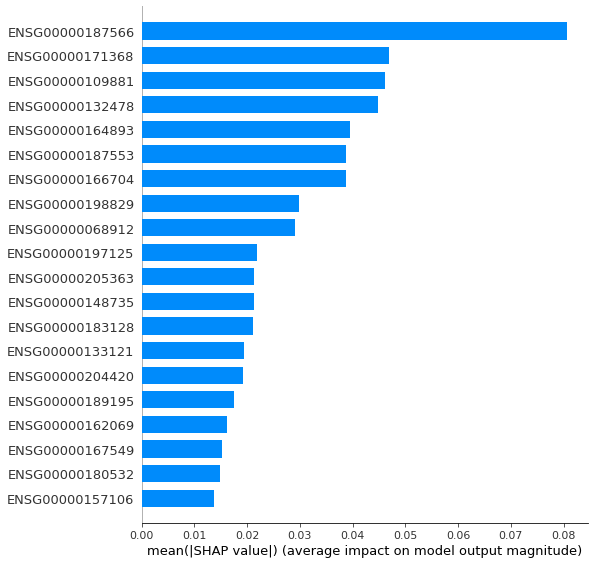

In [ ]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")